In [1]:
import matplotlib.pyplot as plt
import arviz as az

from lqg.io import load_tracking_data

data, blob_widths = load_tracking_data(data_path="../data/")
data.shape

(6, 20, 1068, 2)

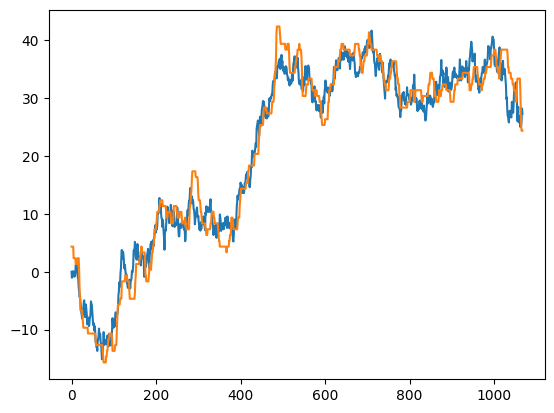

In [2]:
plt.plot(data[0, 0, :, 0])
plt.plot(data[0, 0, :, 1])

In [4]:
seed = 1
models = ["SubjectiveActor"]

results = {model_name: az.from_netcdf(f"../data/processed/{model_name}-{seed}.nc") for model_name in models}

           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
sigma_0  11.844  0.390  11.126   12.590      0.003    0.002   17120.0   
sigma_1  12.188  0.419  11.396   12.956      0.003    0.002   19297.0   
sigma_2  14.951  0.548  13.965   16.028      0.004    0.003   18766.0   
sigma_3  19.438  0.899  17.733   21.098      0.007    0.005   19041.0   
sigma_4  27.277  1.390  24.766   30.001      0.010    0.007   18600.0   
sigma_5  49.542  3.561  43.016   56.399      0.026    0.019   18428.0   

         ess_tail  r_hat  
sigma_0   14474.0    1.0  
sigma_1   14892.0    1.0  
sigma_2   15385.0    1.0  
sigma_3   14257.0    1.0  
sigma_4   14759.0    1.0  
sigma_5   15201.0    1.0  


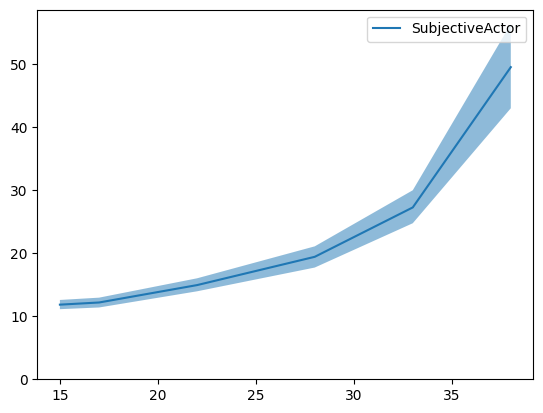

In [5]:
for model_name, inference_data in sorted(results.items()):
    summary = az.summary(inference_data.posterior, var_names=[f"sigma_{i}" for i in range(6)])
    print(summary)

    plt.plot(blob_widths, summary["mean"], label=model_name)
    plt.fill_between(blob_widths, summary["hdi_3%"], summary["hdi_97%"], alpha=0.5)
    plt.ylim(0, )
plt.legend()